In [1]:
import gymnasium as gym
import os
import torch
import pandas as pd
os.chdir('..')
import RL
from RL.algorithm.rlfuse_ppo import Rlfuse_ppo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
import seaborn as sns

import logging
import sys
import datetime

# wifi_df = pd.read_csv('../Services/data/jew_train/raw.csv')
# cam_df = pd.read_csv('../Services/data/jew_train/cam_raw.csv')
# imu_df = pd.read_csv('../Services/data/jew_train/imu_raw.csv')

wifi_df = pd.read_csv('../Services/data/jew_5AI_abla/raw.csv')
cam_df = pd.read_csv('../Services/data/jew_5AI_abla/cam_raw.csv')
imu_df = pd.read_csv('../Services/data/jew_5AI_abla/imu_raw.csv')

# To use differen't log level for file and console
timestamp = datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S')
filename=f'tmp5a_{timestamp}.log'
formatter = logging.Formatter('[%(asctime)s] %(name)s {%(filename)s:%(lineno)d} %(levelname)s - %(message)s')

file_handler = logging.FileHandler(filename=filename)
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)

stream_handler = logging.StreamHandler(sys.stdout)
stream_handler.setLevel(logging.INFO)

# The handlers have to be at a root level since they are the final output
logging.basicConfig(
    level=logging.DEBUG,
    format='[{%(filename)s:%(lineno)d} %(levelname)s - %(message)s',
    handlers=[
        file_handler,
        stream_handler
    ]
)

# Test
logger = logging.getLogger(__name__)


env = gym.make('RL/RLfuse-v0')
env.load_data(wifi_df, cam_df, imu_df, timelength=50)
agent_eval = Rlfuse_ppo(env, logger, load_weight=True)

Using cache found in C:\Users\liuxi/.cache\torch\hub\huggingface_pytorch-transformers_main
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (150, 20)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (150, 6)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:22: UserWarning: WARN: It seems a Box observation spac

[{rlfuse_ppo.py:77} INFO - Setting up logger...


In [2]:
from RL.ablation_utils import printnorm, printnorm_visual

model = agent_eval.actor
model.eval()
model.imu_feature_extractor.register_forward_hook(printnorm)
# model.visual_feature_extractor.register_forward_hook(printnorm_visual)

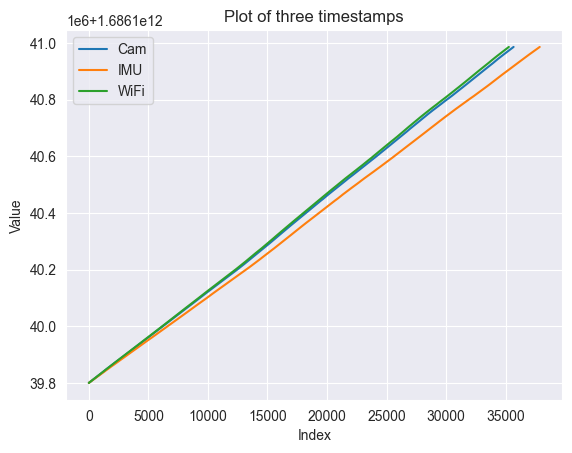

In [3]:
# CUR_IDX = 2000
list_cam = cam_df['timestamp'].drop_duplicates().tolist()
list_imu = imu_df['timestamp'].drop_duplicates().tolist()
list_wifi = wifi_df['timestamp'].drop_duplicates().tolist()

plt.plot(list_cam, label='Cam')
plt.plot(list_imu, label='IMU')
plt.plot(list_wifi, label='WiFi')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of three timestamps')
plt.legend()
plt.show()

In [2]:
CUR_IDX = 3450
def evaluate_model(CUR_IDX):
    obs, info = env.get_evaluate_obs(CUR_IDX)
    action = agent_eval.evaluate_action(obs)
    action_idx, reward = env.evaluate_action(action)
    return obs,  info, action_idx, reward
obs, info, action_idx, reward = evaluate_model(CUR_IDX)
wifi_names = obs[0]
wifi_rssis = obs[1]
imu_vis = obs[2]
cam_vis = obs[3]

data = []
for names_row, rssi_row in zip(wifi_names, wifi_rssis):
    row_dict = {}
    for name, rssi in zip(names_row, rssi_row):
        row_dict[name] = rssi
    data.append(row_dict)
print(CUR_IDX, sum(reward))

3450 2


In [3]:
CUR_IDX_list = np.random.randint(0, 8000, size=100)
success_list = []
for i,idx in enumerate(CUR_IDX_list):
    obs, info, action_idx, reward = evaluate_model(idx)
    print(i, idx, sum(reward))
    if sum(reward) / len(reward) >= 0.5:
        success_list.append(1)
    else:
        success_list.append(0)
print(sum(success_list)/100)

0 2102 38
1 1210 49
2 590 5
3 36 50
4 3609 45
5 4538 2
6 5056 36
7 5532 25
8 430 0
9 5531 24
10 3517 32
11 3060 12
12 443 0
13 7242 15
14 6223 28
15 6824 11
16 7724 50
17 5279 11
18 571 5
19 1768 44
20 7174 38
21 5871 23
22 5972 32
23 2319 11
24 6156 6
25 5089 43
26 7882 37
27 7385 49
28 4059 12
29 1039 36
30 7177 35
31 690 35
32 312 35
33 3590 47
34 245 12
35 6626 0
36 7283 46
37 4224 26
38 609 16
39 7076 9
40 7523 50
41 1028 27
42 6885 5
43 6826 10
44 3010 16
45 7795 36
46 6167 7
47 5554 30
48 1904 25
49 5243 34
50 745 21
51 5723 30
52 1354 48
53 7194 19
54 4282 22
55 4595 29
56 1772 46
57 510 20
58 2858 32
59 5901 25
60 3820 38
61 4315 6
62 1674 43
63 6893 6
64 2930 15
65 734 17
66 1927 36
67 5516 30
68 5794 38
69 5788 31
70 6859 7
71 119 49
72 5512 28
73 3019 19
74 6705 3
75 2754 16
76 1788 46
77 7025 2
78 7270 42
79 4168 44
80 5078 41
81 2815 38
82 4105 9
83 1544 48
84 7044 2
85 4571 7
86 7750 49
87 1184 46
88 3029 12
89 3172 28
90 2739 13
91 1193 46
92 5869 21
93 5946 31
94 2857 

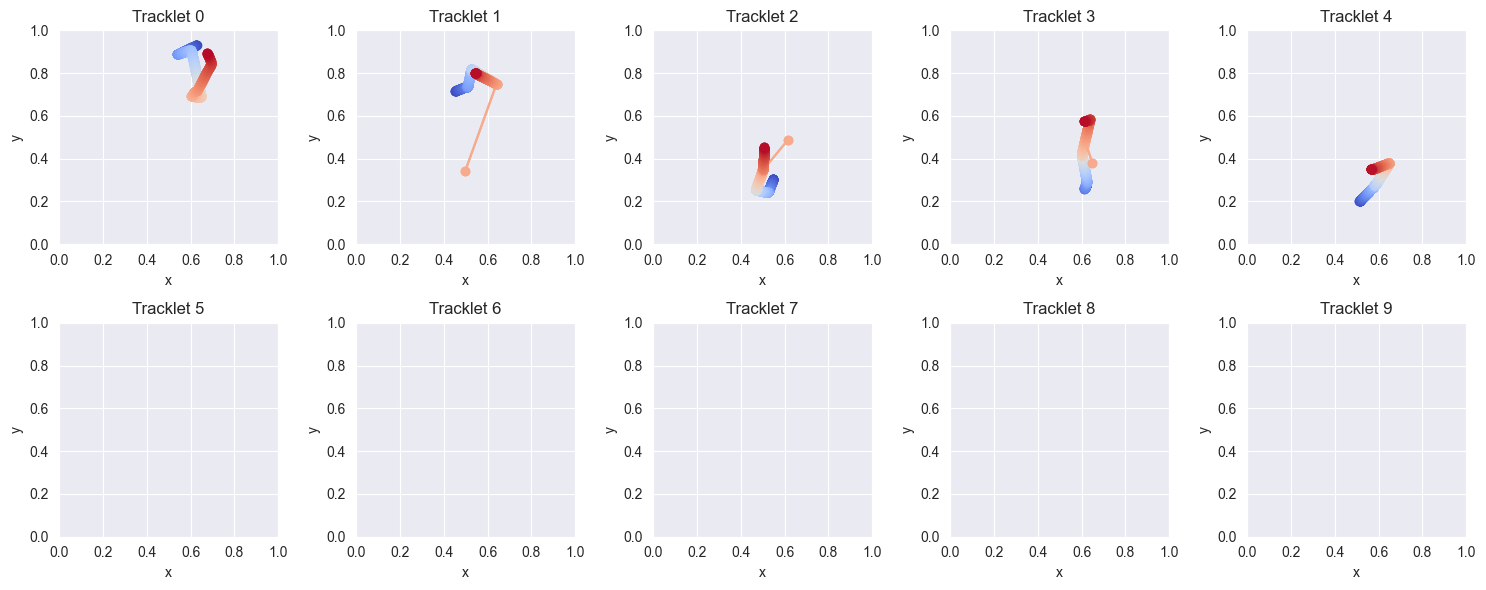

In [7]:
# Set up a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Flatten the axes array for easier indexing
axes_flat = axes.flatten()

# Create a colormap and normalize the timesteps
colormap = get_cmap('coolwarm')
norm = Normalize(vmin=0, vmax=len(cam_vis))

# Iterate through each tracklet and plot it in a subplot
for i in range(10):
    tracklet = cam_vis[:, i, :]
    # Ignore data points with value (0.0, 0.0)
    non_zero_mask = np.any(tracklet != 0.0, axis=1)
    tracklet_filtered = tracklet[non_zero_mask]

    x, y = tracklet_filtered[:, 0], tracklet_filtered[:, 1]

    # Plot the points with gradient color from blue to red
    for j in range(len(x) - 1):
        axes_flat[i].plot(x[j:j+2], y[j:j+2], marker='o', color=colormap(norm(j)))

    axes_flat[i].set_title(f'Tracklet {i}')
    axes_flat[i].set_xlabel('x')
    axes_flat[i].set_ylabel('y')

    # Set x and y axis limits
    axes_flat[i].set_xlim(0, 1)
    axes_flat[i].set_ylim(0, 1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [11]:
def draw_single_tracklet(track):
    non_zero_mask = np.any(track != 0.0, axis=1)
    track_filtered = track[non_zero_mask]
    x, y = track_filtered[:, 0], track_filtered[:, 1]
    plt.figure(figsize=(10,5))
    # Plot the points with gradient color from blue to red
    for j in range(len(x) - 1):
        plt.plot(x[j:j+2], y[j:j+2], marker='o', color=colormap(norm(j)))
    # plt.plot(x, y)
    # plt.xlabel('X Coordinate')
    # plt.ylabel('Y Coordinate')
    # plt.title('Plot of Y vs X')
    plt.grid(False)
    plt.show()

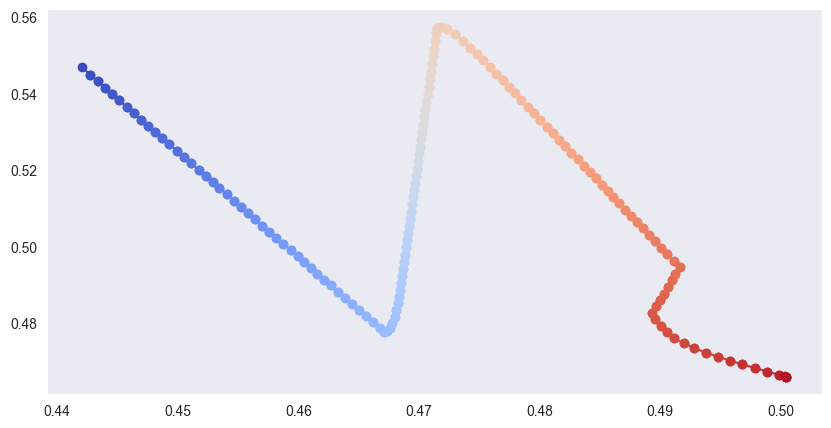

In [15]:
track = cam_vis[:, 5, :]
draw_single_tracklet(track)

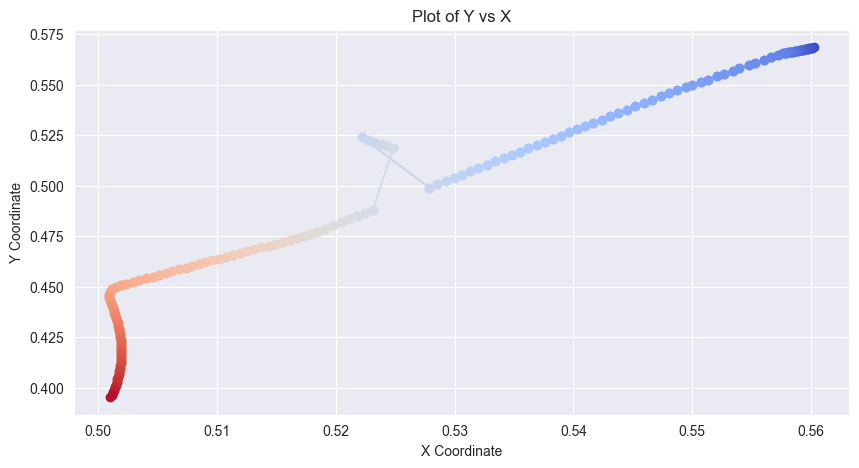

In [18]:
track = cam_vis[:, 8, :]
draw_single_tracklet(track)

In [8]:
info["label"]

[['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_AI_C_1', 'BP_AI_C_2', 'BP_AI_C_3'],
 ['BP_TargetAI_C_0', 'BP_AI_C_0', 'BP_

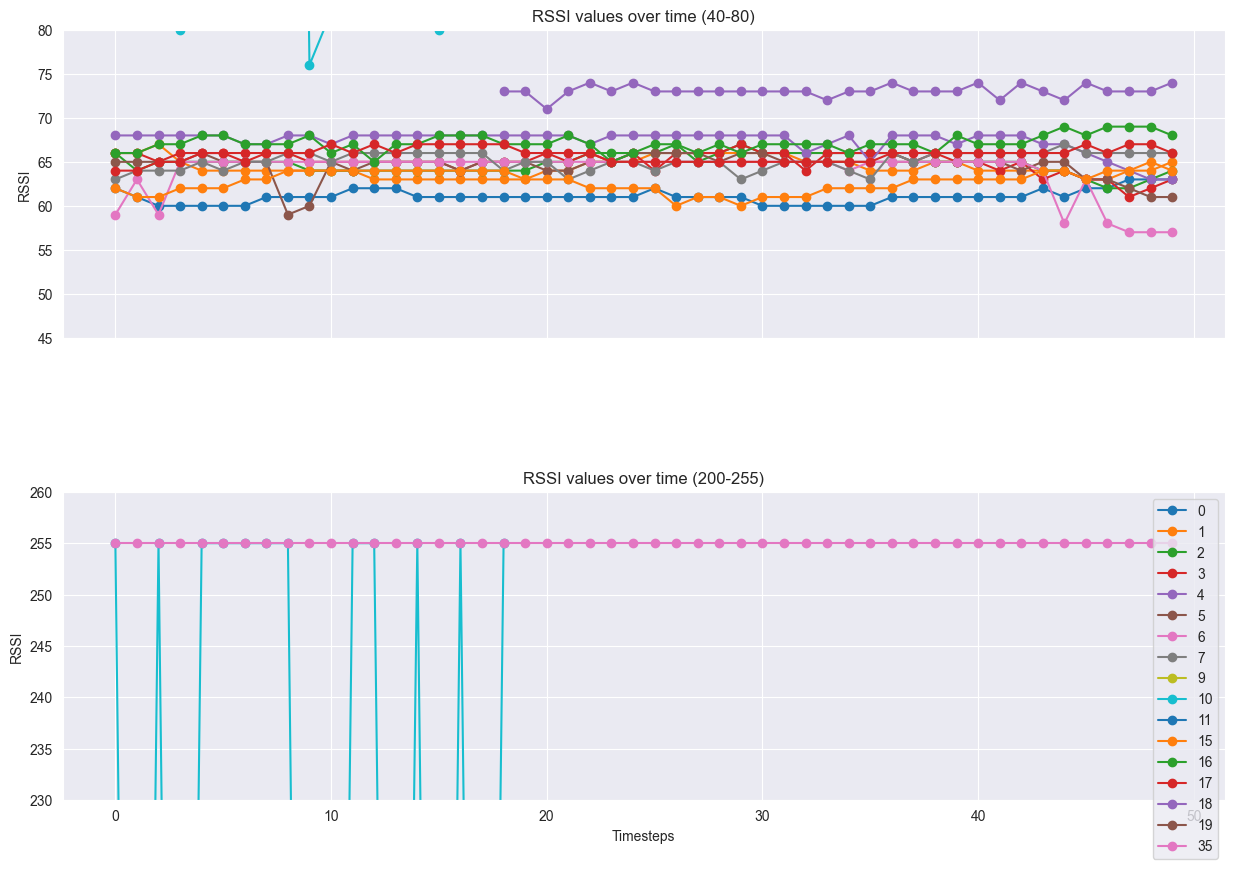

In [22]:
def plot_rssi(data, timesteps):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    fig.subplots_adjust(hspace=0.5)  # Add space between subplots
    plt.xlabel("Timesteps")

    ax1.set_ylabel("RSSI")
    ax1.set_ylim(45, 80)
    ax1.set_title("RSSI values over time (40-80)")

    ax2.set_ylabel("RSSI")
    ax2.set_ylim(230, 260)
    ax2.set_title("RSSI values over time (200-255)")

    all_names = sorted(set().union(*data))  # Get all unique names from the data

    for name in all_names:
        rssi_values = []
        for timestep in range(timesteps):
            rssi_values.append(data[timestep].get(name, None))

        ax1.plot(range(timesteps), rssi_values, marker='o', label=name)
        ax2.plot(range(timesteps), rssi_values, marker='o', label=name)

    # ax1.legend()
    ax2.legend()
    plt.show()

plot_rssi(data, 50)

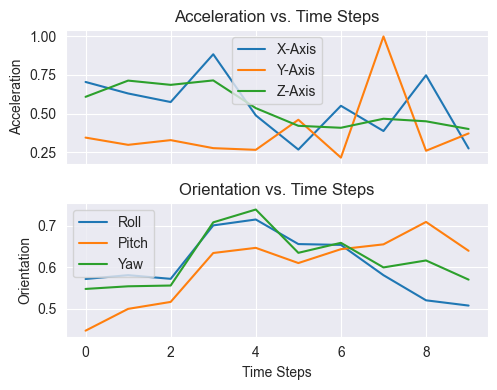

In [7]:
ax, ay, az, roll, pitch, yaw = imu_vis.T

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

# Acceleration
ax1.plot(ax, label='X-Axis')
ax1.plot(ay, label='Y-Axis')
ax1.plot(az, label='Z-Axis')
ax1.set_ylabel('Acceleration')
ax1.set_title('Acceleration vs. Time Steps')
ax1.legend()

# Orientation
ax2.plot(roll, label='Roll')
ax2.plot(pitch, label='Pitch')
ax2.plot(yaw, label='Yaw')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Orientation')
ax2.set_title('Orientation vs. Time Steps')
ax2.legend()

fig.tight_layout()
plt.show()

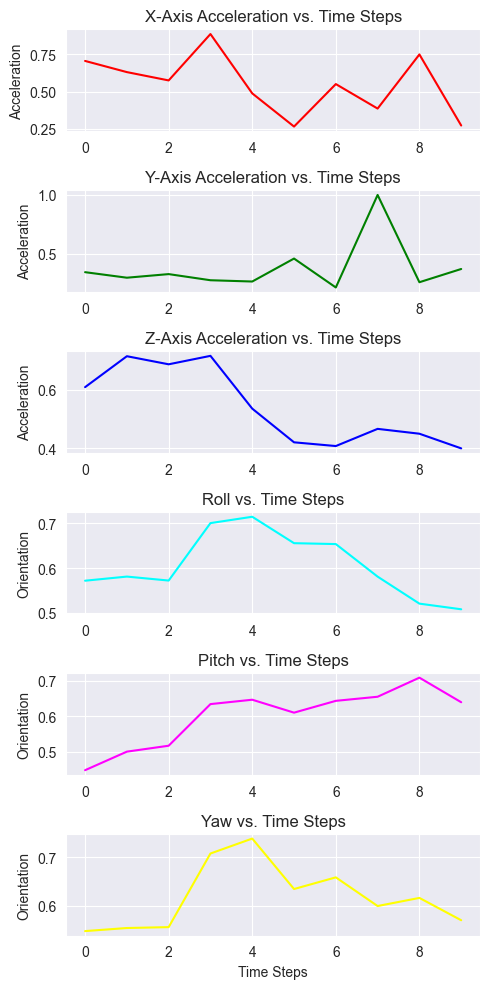

In [8]:
fig, axs = plt.subplots(6, 1, figsize=(5, 10))

# Acceleration
axs[0].plot(ax, label='X-Axis', color='red')
axs[0].set_ylabel('Acceleration')
axs[0].set_title('X-Axis Acceleration vs. Time Steps')
# axs[0].legend()

axs[1].plot(ay, label='Y-Axis', color='green')
axs[1].set_ylabel('Acceleration')
axs[1].set_title('Y-Axis Acceleration vs. Time Steps')
# axs[1].legend()

axs[2].plot(az, label='Z-Axis', color='blue')
axs[2].set_ylabel('Acceleration')
axs[2].set_title('Z-Axis Acceleration vs. Time Steps')
# axs[2].legend()

# Orientation
axs[3].plot(roll, label='Roll', color='cyan')
axs[3].set_ylabel('Orientation')
axs[3].set_title('Roll vs. Time Steps')
# axs[3].legend()

axs[4].plot(pitch, label='Pitch', color='magenta')
axs[4].set_ylabel('Orientation')
axs[4].set_title('Pitch vs. Time Steps')
# axs[4].legend()

axs[5].plot(yaw, label='Yaw', color='yellow')
axs[5].set_xlabel('Time Steps')
axs[5].set_ylabel('Orientation')
axs[5].set_title('Yaw vs. Time Steps')
# axs[5].legend()

fig.tight_layout()
plt.show()


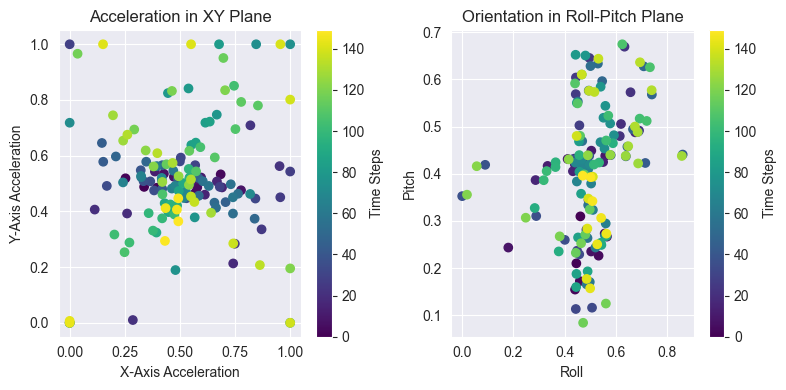

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Acceleration
scatter1 = ax1.scatter(ax, ay, c=np.arange(len(ax)), cmap='viridis')
ax1.set_xlabel('X-Axis Acceleration')
ax1.set_ylabel('Y-Axis Acceleration')
ax1.set_title('Acceleration in XY Plane')
fig.colorbar(scatter1, ax=ax1).set_label('Time Steps')

# Orientation
scatter2 = ax2.scatter(roll, pitch, c=np.arange(len(roll)), cmap='viridis')
ax2.set_xlabel('Roll')
ax2.set_ylabel('Pitch')
ax2.set_title('Orientation in Roll-Pitch Plane')
fig.colorbar(scatter2, ax=ax2).set_label('Time Steps')

fig.tight_layout()
plt.show()

In [9]:
action_idx

[-1,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

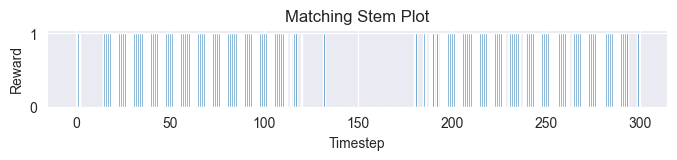

In [8]:
plt.figure(figsize=(8, 1))
plt.bar(np.arange(len(reward)), reward)
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.title('Matching Stem Plot')
plt.show()

In [14]:
sum(reward)

159

In [27]:
import torch.nn as nn
bn = nn.BatchNorm1d(64)
test = torch.randn(1, 50, 64)
out = bn(test)

RuntimeError: running_mean should contain 50 elements not 64

In [143]:
init_cov_var = torch.full(size=(10,), fill_value=0.05)
init_cov_var

tensor([0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500])

In [142]:
-0.000009 * 100000

-0.9

In [145]:
cov_var = init_cov_var * np.exp(-0.000009 * 150000)
cov_var

tensor([0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130,
        0.0130])

In [113]:
min_cov_var = torch.full(size=(10,), fill_value=0.01)
min_cov_var

tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100])

In [134]:
final_cov_var = np.maximum(cov_var, min_cov_var)
final_cov_var

tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100])